Statistical Interpretation and Exploratory Data Analysis (HDI)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [71]:
dataset= pd.read_csv(
    "/content/drive/MyDrive/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)



Problem1A

Task-1 Extract Latest Year (2022)

In [72]:
dataset['year'] = pd.to_numeric(dataset['year'], errors='coerce')
years = dataset['year'].unique()
hdi_2022_dataset= dataset[dataset['year'] == 2022].copy()


TASK-2 Data Exploration

In [73]:
hdi_2022_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

In [74]:
hdi_2022_dataset.columns


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

TASK-3 Missing Values & Data Cleaning

In [75]:
hdi_2022_dataset.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [76]:
numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

for col in numeric_cols:
    hdi_2022_dataset[col] = pd.to_numeric(hdi_2022_dataset[col], errors='coerce')

In [77]:
hdi_2022_df = hdi_2022_dataset.drop_duplicates()

In [78]:
hdi_2022_df = hdi_2022_dataset.dropna(subset=['hdi'])


Task-4 Basic Statistics

In [79]:
mean_hdi = hdi_2022_dataset['hdi'].mean()
median_hdi = hdi_2022_dataset['hdi'].median()
std_hdi = hdi_2022_dataset['hdi'].std()

mean_hdi, median_hdi, std_hdi



(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [80]:
hdi_2022_dataset.loc[hdi_2022_dataset['hdi'].idxmax()][['country', 'hdi']]


,5609
country,Switzerland
hdi,0.967


In [81]:
hdi_2022_dataset.loc[hdi_2022_dataset['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


Task-5 Filtering & Sorting

In [82]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

high_hdi_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


Task-6 Add HDI Category Column (UNDP Thresholds)

In [83]:
def categorize_hdi(value):
    if value < 0.550:
        return "Low"
    elif 0.550 <= value < 0.700:
        return "Medium"
    elif 0.700 <= value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

print(hdi_2022_df['HDI_Category'].value_counts())

hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

HDI_Category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64


/tmp/ipython-input-639304610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)


Problem 1B HDI TREND ANALYSIS (2020–2022)

Task-1 Filter Years




In [84]:
hdi_1b = dataset[dataset['year'].isin([2020, 2021, 2022])].copy()

In [85]:
hdi_1b.to_csv("HDI_problem1B.csv", index=False)


Task-2 Cleaning

In [86]:
hdi_1b[['hdi', 'country', 'year']].isnull().sum()




,0
hdi,8
country,0
year,0


In [87]:
num_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in num_cols:
    hdi_1b[col] = pd.to_numeric(hdi_1b[col], errors='coerce')

In [88]:
hdi_1b = hdi_1b.dropna(subset=['hdi', 'country', 'year'])
hdi_1b = hdi_1b.drop_duplicates()


Task3A Line Chart (5 Countries)

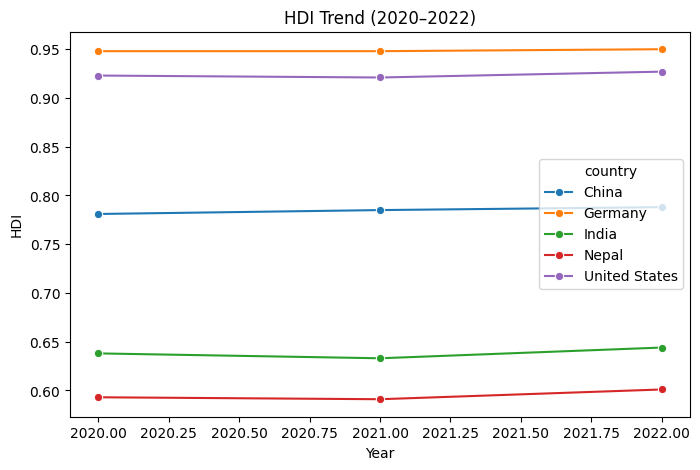

In [89]:
countries = ['Nepal', 'India', 'China', 'United States', 'Germany']
subset = hdi_1b[hdi_1b['country'].isin(countries)]
plt.figure(figsize=(8,5))
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


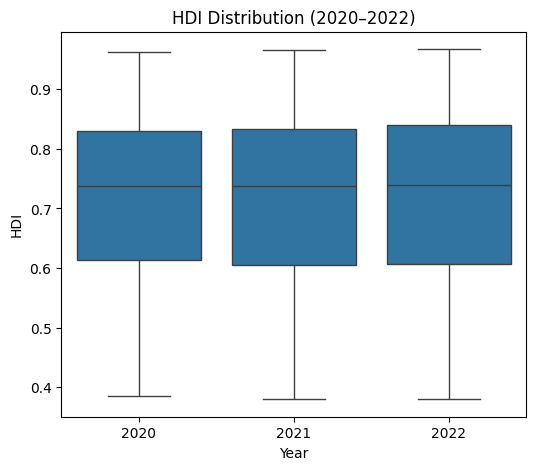

In [90]:
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

Scatter Plot (HDI vs GNI)

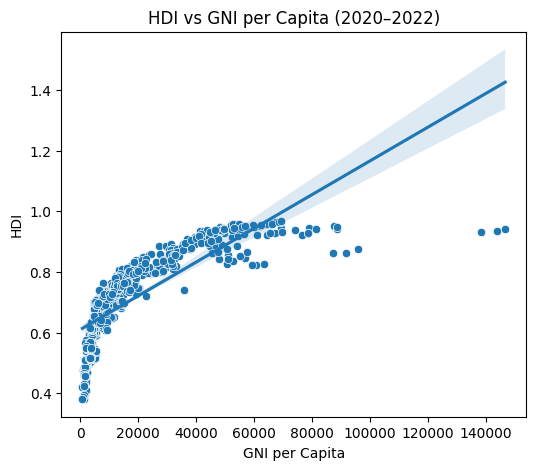

In [91]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=hdi_1b,
    x='gross_inc_percap',
    y='hdi'
)

sns.regplot(
    data=hdi_1b,
    x='gross_inc_percap',
    y='hdi',
    scatter=False
)

plt.title("HDI vs GNI per Capita (2020–2022)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.show()


Problem-2 ADVANCED HDI EXPLORATION

Task-1 South Asia Subset

In [118]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
sa_dataset = dataset[dataset['country'].isin(south_asia)].copy()
sa_dataset.to_csv("HDI_SouthAsia.csv", index=False)


Task-2 Composite Score

In [94]:
sa_dataset['Composite_Score'] = (
    0.30 * sa_dataset['life_expectancy'] +
    0.30 * sa_dataset['gross_inc_percap']
)


In [95]:
sa_ranked = sa_dataset.sort_values(by='Composite_Score', ascending=False)
sa_ranked[['country', 'Composite_Score']].head()


,country,Composite_Score
3530,Maldives,5678.289357
3527,Maldives,5628.012408
3526,Maldives,5440.721295
3525,Maldives,5266.375503
3524,Maldives,5097.397866


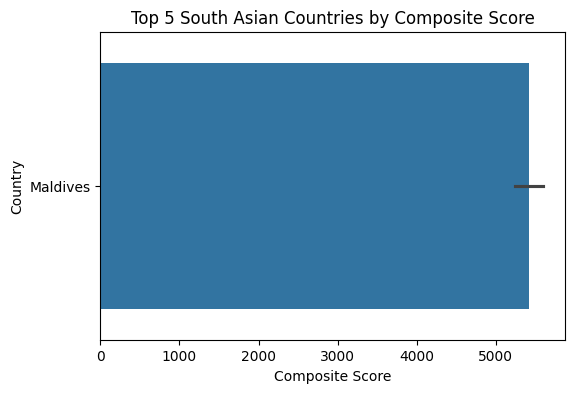

In [96]:
top5 = sa_ranked.head(5)

plt.figure(figsize=(6,4))
sns.barplot(data=top5, x='Composite_Score', y='country')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()


Task-3 Outlier Detection (IQR)

In [97]:
Q1 = sa_dataset['hdi'].quantile(0.25)
Q3 = sa_dataset['hdi'].quantile(0.75)
IQR = Q3 - Q1

outliers = sa_dataset[
    (sa_dataset['hdi'] < Q1 - 1.5 * IQR) |
    (sa_dataset['hdi'] > Q3 + 1.5 * IQR)
]

outliers[['country', 'hdi']]


,country,hdi


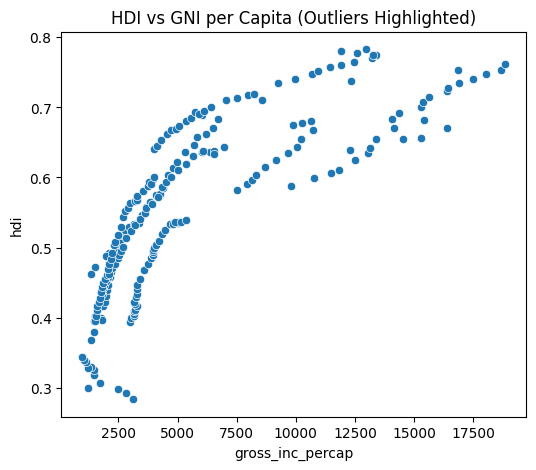

In [98]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=sa_dataset, x='gross_inc_percap', y='hdi')
sns.scatterplot(data=outliers, x='gross_inc_percap', y='hdi', color='red')
plt.title("HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()


Task-4 Correlation

In [99]:
sa_dataset[['hdi', 'life_expectancy', 'gender_development']].corr()


,hdi,life_expectancy,gender_development
hdi,1.000000,0.958761,0.865621
life_expectancy,0.958761,1.000000,0.829553
gender_development,0.865621,0.829553,1.000000


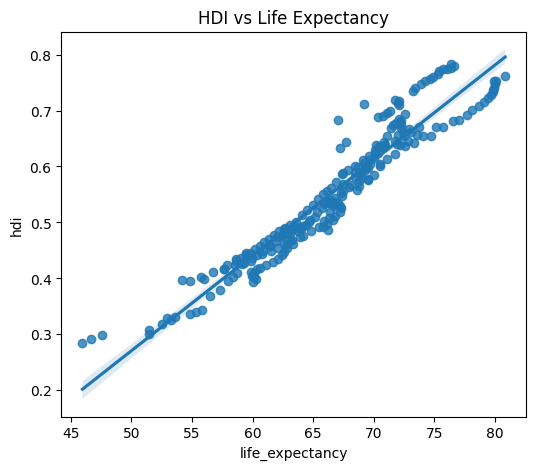

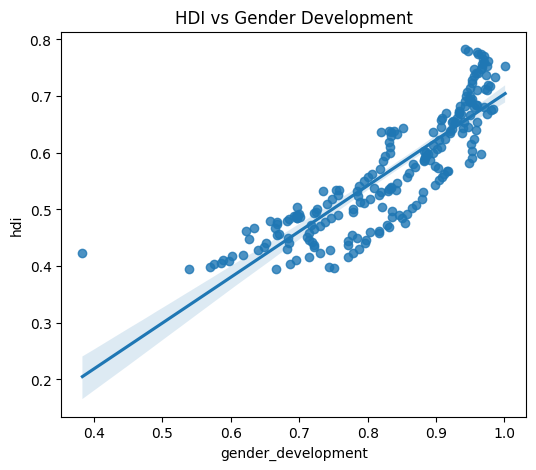

In [100]:
# HDI vs Life Expectancy
plt.figure(figsize=(6,5))
sns.regplot(data=sa_dataset, x='life_expectancy', y='hdi')
plt.title("HDI vs Life Expectancy")
plt.show()

# HDI vs Gender Development
plt.figure(figsize=(6,5))
sns.regplot(data=sa_dataset, x='gender_development', y='hdi')
plt.title("HDI vs Gender Development")
plt.show()


Task-5 GNI–HDI Gap

In [101]:
sa_dataset['GNI_HDI_Gap'] = sa_dataset['gross_inc_percap'] - sa_dataset['hdi']


In [102]:
sa_dataset.sort_values(by='GNI_HDI_Gap', ascending=False).head(3)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score,GNI_HDI_Gap
3530,3531,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,...,46.928068,46.269366,4.597701,95.402299,53.34,78.21,3.299409,NaN,5678.289357,18846.03019
3527,3528,MDV,Maldives,2019,0.753,80.116,0.504508,0.753833,0.752974,81.162,...,45.125182,44.598528,4.597701,95.402299,50.61,78.60,3.870900,NaN,5628.012408,18679.17236
3526,3527,MDV,Maldives,2018,0.747,80.013,0.489758,0.727985,0.754359,81.074,...,43.322295,42.927689,5.882353,94.117647,48.22,77.62,3.553592,NaN,5440.721295,18054.97765


In [103]:
sa_dataset.sort_values(by='GNI_HDI_Gap').head(3)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score,GNI_HDI_Gap
11,12,AFG,Afghanistan,2001,0.344,55.798,19.688633,NaN,NaN,57.344,...,2.334909,10.470540,NaN,NaN,NaN,NaN,0.054300,2.1080,311.079466,980.789554
10,11,AFG,Afghanistan,2000,0.340,55.298,19.542983,NaN,NaN,56.858,...,2.162488,9.859265,NaN,NaN,NaN,NaN,0.053579,2.0707,330.792206,1047.002686
9,10,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,...,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832,353.150571,1121.985570


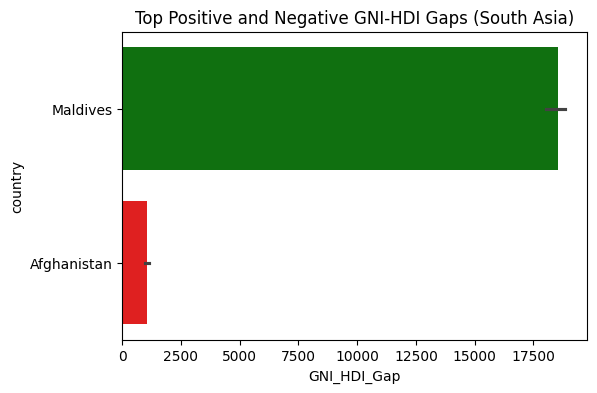

In [104]:
top_pos = sa_dataset.sort_values(by='GNI_HDI_Gap', ascending=False).head(3)
top_neg = sa_dataset.sort_values(by='GNI_HDI_Gap').head(3)

plt.figure(figsize=(6,4))
sns.barplot(data=top_pos, x='GNI_HDI_Gap', y='country', color='green')
sns.barplot(data=top_neg, x='GNI_HDI_Gap', y='country', color='red')
plt.title("Top Positive and Negative GNI-HDI Gaps (South Asia)")
plt.show()


Problem-3 SOUTH ASIA vs MIDDLE EAST

Task-1 Create South Asia & Middle East Subsets

In [105]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
sa_dataset_3 = hdi_1b[hdi_1b['country'].isin(south_asia)].copy()
sa_dataset_3.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)


In [106]:
middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

me_dataset = hdi_1b[hdi_1b['country'].isin(middle_east)].copy()
me_dataset.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Task-2 Descriptive Statistics — Mean & Std of HDI

In [107]:
# South Asia
sa_mean = sa_dataset_3['hdi'].mean()
sa_std = sa_dataset_3['hdi'].std()

# Middle East
me_mean = me_dataset['hdi'].mean()
me_std = me_dataset['hdi'].std()

sa_mean, sa_std, me_mean, me_std


(np.float64(0.6395833333333333),
 0.09827331747496995,
 np.float64(0.7889090909090909),
 0.14129476362297624)

Task-3 Top and Bottom Performers (HDI)

In [108]:
sa_top3 = sa_dataset_3.sort_values(by='hdi', ascending=False).head(3)
sa_bottom3 = sa_dataset_3.sort_values(by='hdi').head(3)


In [109]:
me_top3 = me_dataset.sort_values(by='hdi', ascending=False).head(3)
me_bottom3 = me_dataset.sort_values(by='hdi').head(3)


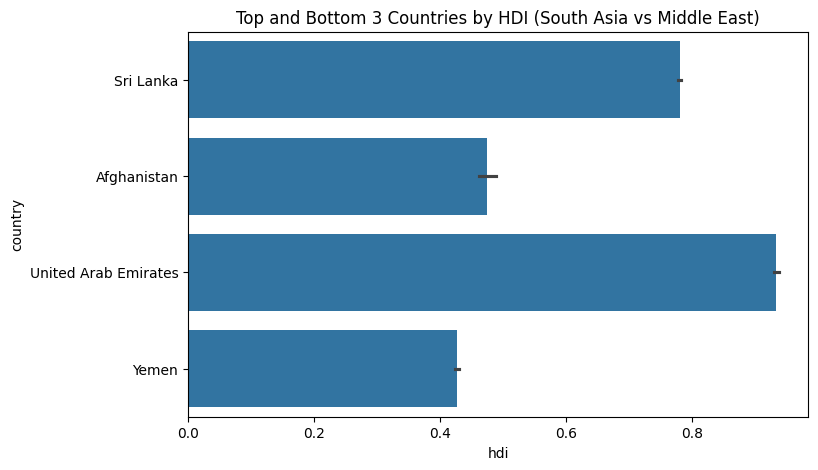

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(x='hdi', y='country', data=pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3]))
plt.title("Top and Bottom 3 Countries by HDI (South Asia vs Middle East)")
plt.show()


Task-4 Metric Comparisons (Grouped Bar Charts)

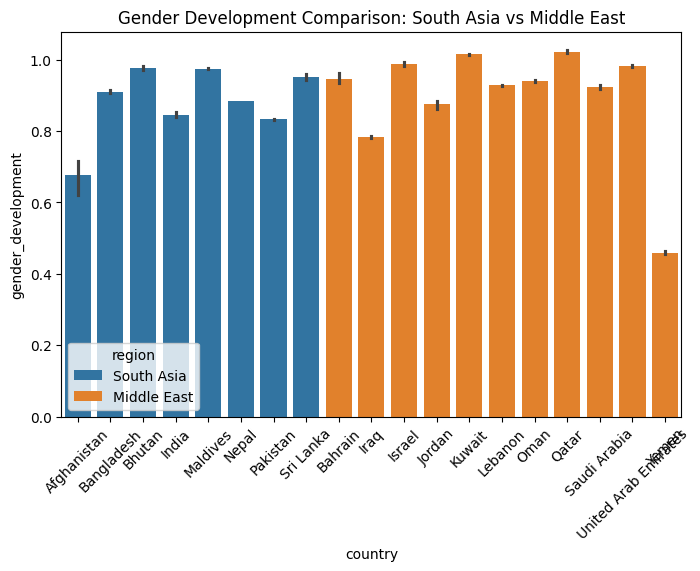

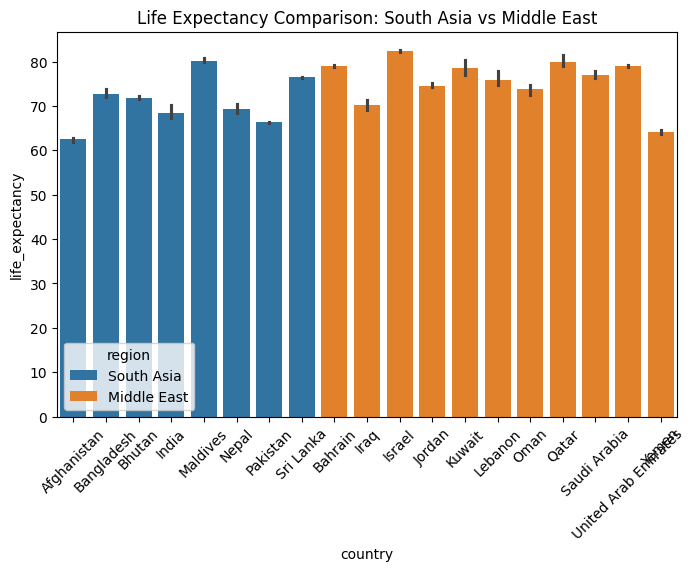

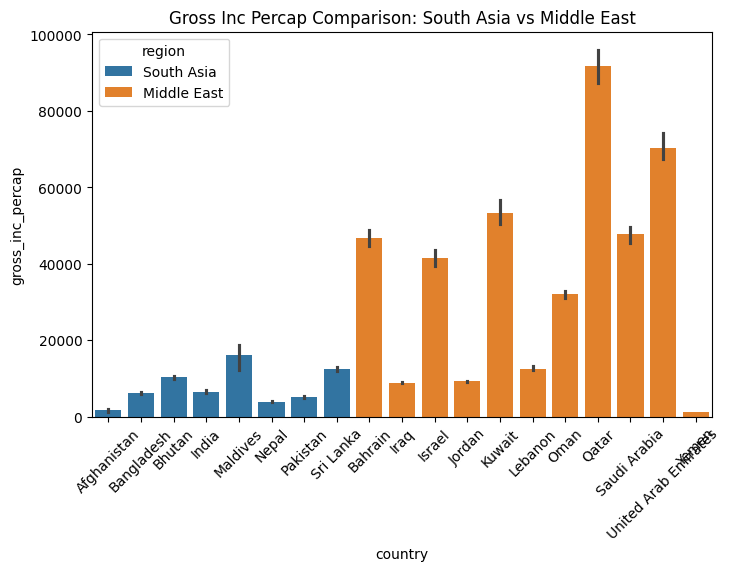

In [111]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

for metric in metrics:
    combined = pd.concat([
        sa_dataset_3[['country', 'year', metric]].assign(region='South Asia'),
        me_dataset[['country', 'year', metric]].assign(region='Middle East')
    ])

    plt.figure(figsize=(8,5))
    sns.barplot(data=combined, x='country', y=metric, hue='region')
    plt.title(f"{metric.replace('_',' ').title()} Comparison: South Asia vs Middle East")
    plt.xticks(rotation=45)
    plt.show()


Task-5 HDI Disparity
Range and Coefficient of Variation (CV = std/mean)

In [112]:
# South Asia
sa_range = sa_dataset_3['hdi'].max() - sa_dataset_3['hdi'].min()
sa_cv = sa_dataset_3['hdi'].std() / sa_dataset_3['hdi'].mean()

# Middle East
me_range = me_dataset['hdi'].max() - me_dataset['hdi'].min()
me_cv = me_dataset['hdi'].std() / me_dataset['hdi'].mean()

sa_range, sa_cv, me_range, me_cv


(0.321,
 np.float64(0.1536520924690084),
 0.5130000000000001,
 np.float64(0.17910145193048382))

Task-6 Correlation Analysis

In [113]:
# HDI correlations with Life Expectancy and Gender Development
sa_corr = sa_dataset_3[['hdi', 'life_expectancy', 'gender_development']].corr()
me_corr = me_dataset[['hdi', 'life_expectancy', 'gender_development']].corr()

sa_corr, me_corr


(                         hdi  life_expectancy  gender_development
 hdi                 1.000000         0.938764            0.874218
 life_expectancy     0.938764         1.000000            0.853780
 gender_development  0.874218         0.853780            1.000000,
                          hdi  life_expectancy  gender_development
 hdi                 1.000000         0.933123            0.935670
 life_expectancy     0.933123         1.000000            0.912836
 gender_development  0.935670         0.912836            1.000000)

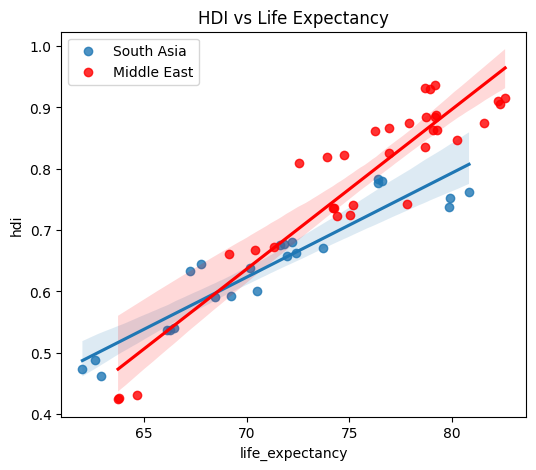

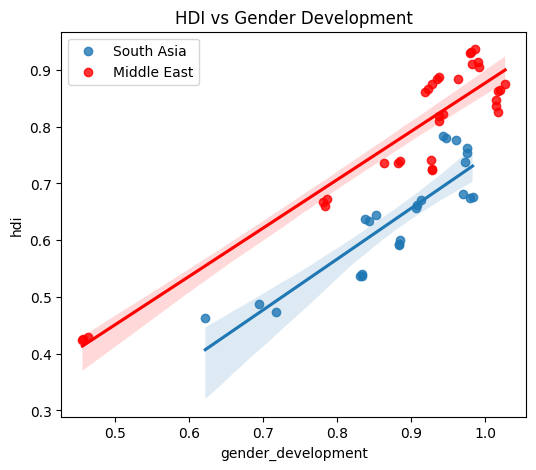

In [114]:
for metric in ['life_expectancy', 'gender_development']:
    plt.figure(figsize=(6,5))
    sns.regplot(data=sa_dataset_3, x=metric, y='hdi', label='South Asia')
    sns.regplot(data=me_dataset, x=metric, y='hdi', label='Middle East', color='red')
    plt.title(f"HDI vs {metric.replace('_',' ').title()}")
    plt.legend()
    plt.show()


Task-7 Outlier Detection

Using 1.5 × IQR rule

In [117]:
# South Asia
Q1_sa = sa_dataset_3['hdi'].quantile(0.25)
Q3_sa = sa_dataset_3['hdi'].quantile(0.75)
IQR_sa = Q3_sa - Q1_sa

sa_outliers = sa_dataset_3[(sa_dataset_3['hdi'] < Q1_sa - 1.5*IQR_sa) | (sa_dataset_3['hdi'] > Q3_sa + 1.5*IQR_sa)]

# Middle East
Q1_me = me_dataset['hdi'].quantile(0.25)
Q3_me = me_dataset['hdi'].quantile(0.75)
IQR_me = Q3_me - Q1_me

me_outliers = me_dataset[(me_dataset['hdi'] < Q1_me - 1.5*IQR_me) | (me_dataset['hdi'] > Q3_me + 1.5*IQR_me)]


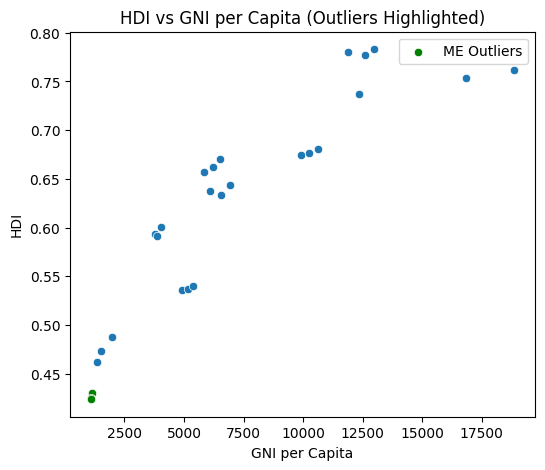

In [116]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=sa_dataset_3, x='gross_inc_percap', y='hdi')
sns.scatterplot(data=sa_outliers, x='gross_inc_percap', y='hdi', color='red', label='SA Outliers')
sns.scatterplot(data=me_outliers, x='gross_inc_percap', y='hdi', color='green', label='ME Outliers')
plt.title("HDI vs GNI per Capita (Outliers Highlighted)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()
